# Convolutional Neural Network Example

Build a convolutional neural network with TensorFlow.

This example shows how to build a convolutional neural network classifier to classify digits 0-9 in the MNIST dataset.

- Author: Aymeric Damien
- Modified by: Vikas Nataraja
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

## CNN Overview

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

## MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. 

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

## Import the necessary libraries

In [1]:
# future is imported to allow the use of different versions of Python
from __future__ import division, print_function, absolute_import

# TensorFlow is the Deep Learning library created by Google that is used to build the neural network
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Read in the dataset 

* Training images are loaded into `train_images` as numpy arrays, corresponding labels (ground truth) are read into another numpy array called `train_labels`
* A similar procedure is followed for test images.
* Finally, the arrays are cast to 32 bit float because TensorFlow takes in float images

* `train_images` will be a 3D array - (num_of_images, height, width)
* `train_labels` will be a 1D array of 0-9 because we are trying to predict digits 0-9. So the labels are solutions/ground truth to the coresponding train_images
* `test_images` will be a 3D array - (num_of_images, height, width)
* `test_labels` will be a 1D array of 0-9 because we are trying to predict digits 0-9. So the labels are solutions/ground truth to the corresponding test_labels


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = np.float32(train_images)
test_images = np.float32(test_images)

## Size of data

In [3]:
print('Number of training images: ',train_images.shape[0])
print('Each training image is of size: ',train_images.shape[1:])
print('Number of training labels: ',train_labels.shape[0],'\n')
print('Number of test images: ',test_images.shape[0])
print('Each test image is of size: ',test_images.shape[1:])
print('Number of test labels: ',test_images.shape[0])

Number of training images:  60000
Each training image is of size:  (28, 28)
Number of training labels:  60000 

Number of test images:  10000
Each test image is of size:  (28, 28)
Number of test labels:  10000


## Visualizing the dataset - what does the MNIST dataset look like?

* Here, we visualize the training set. Each time this cell block is run, random images from the training set will be displayed

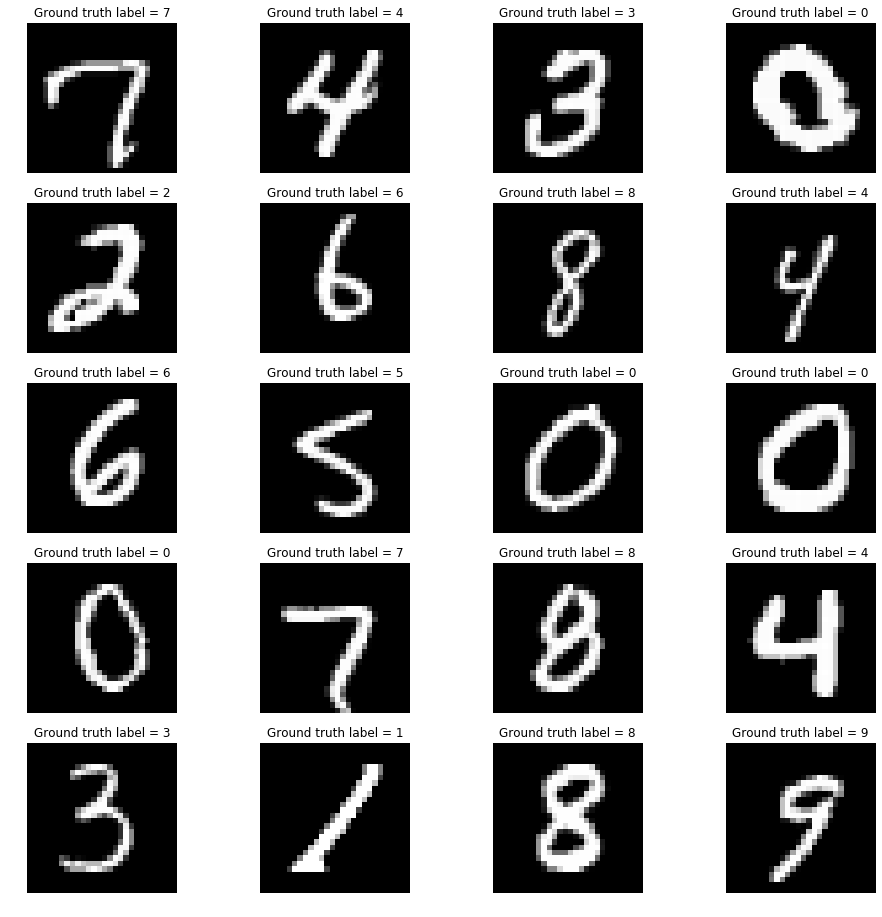

In [4]:
from random import randint

fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    # show random images from the dataset
    random_range = randint(0, train_images.shape[0]-1)
    img = train_images[random_range]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap='gray')
    plt.title('Ground truth label = {}'.format(train_labels[random_range]))
    plt.axis('off')   
plt.show()

## Model directory

This is where the entire model will be saved on your computer. 

In [5]:
#########################################################
# CHANGE THIS DIRECTORY TO ANY DIRECTORY ON YOUR SYSTEM!!!
# This is where the model will be saved after it is run
#########################################################
model_dir = 'C:/Users/hnvik/Desktop/CU Boulder/Fall 2019/ATOC 4815/DeepLearning/atoc'

## Hyperparameters

These are the parameters that can be tuned depending on how training goes. For example, 

    * If the model is too slow to train, decrease the batch size.
    * If the loss is still high after training, increase the number of steps
    * If the model is learning too slowly or is not converging faster, increase the learning rate.

        
**Batch size** 
- The number of images to be taken and trained before updating the weights.
- This is done to reduce the memory consumption. Instead of training all images at the same time, we do it batch-by-batch.
- Batch sizes are usually in powers of 2 e.g 16, 32, 64, 128 ...
- For example if your total number of training images = 2000 and batch size is 128 then we get 15 full batches and the final batch will have the remaining images.
- Higher batch size almost always gives better accuracies but will be computationally slow

**Learning rate**
- It is a number between 0 and 1
- Dictates how fast your optimization moves. A popular optimization algorithm is gradient descent.
- Learning rates are usually set in tenths like 0.1, 0.01 etc,. It is a good idea to start with a very low value and gradually increase

**Number of steps**
- Indicates how many epochs to train for.
- Generally speaking, it is common to train for 100,000 or even 500,000 epochs. For this example we choose a small number - 2000


In [6]:
# Training Parameters
learning_rate = 0.001
num_steps = 2000
batch_size = 128

# Network Parameters
dropout = 0.25 # Dropout, probability to drop a unit

## Non-tunable parameters

In [7]:
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

## Define the layers in the network

* The convolutional layer, max pooling layer, fully connected layer are all defined here.
* This is essentially the bulk of the work in creating your model

In [8]:
# Create the neural network
def conv_net(x_dict, n_classes, dropout, reuse, is_training):
    
    # Define a scope for reusing the variables
    with tf.variable_scope('ConvNet', reuse=reuse):
        
        ################################################################
        # INPUT LAYER
        ################################################################
        # TF Estimator input is a dict, in case of multiple inputs
        x = x_dict['images']

        # Reshape to match picture format [Height x Width x Channel]
        # Tensor input becomes 4-D: [Batch Size, Height, Width, Channel]
        x = tf.reshape(x, shape=[-1, 28, 28, 1])
        
        #################################################################
        # CONVOLUTION LAYER - 1
        #################################################################
        # Convolution Layer with 32 filters and a kernel size of 5
        conv1 = tf.layers.conv2d(x, 32, 5, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv1 = tf.layers.max_pooling2d(conv1, 2, 2)

        #################################################################
        # CONVOLUTION LAYER - 2
        #################################################################
        # Convolution Layer with 64 filters and a kernel size of 3
        conv2 = tf.layers.conv2d(conv1, 64, 3, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv2 = tf.layers.max_pooling2d(conv2, 2, 2)
        
        #################################################################
        # FULLY-CONNECTED LAYER - 1
        #################################################################
        # Flatten the data to a 1-D vector for the fully connected layer
        fc1 = tf.contrib.layers.flatten(conv2)

        # Fully connected layer (in tf contrib folder for now)
        fc1 = tf.layers.dense(fc1, 1024)
        # Apply Dropout (if is_training is False, dropout is not applied)
        fc1 = tf.layers.dropout(fc1, rate=dropout, training=is_training)

        # Output layer, class prediction
        out = tf.layers.dense(fc1, n_classes)

    return out

## Define a model function

* The model function rounds out the network
* It combines your layers, defines the loss functions, defines the optimizer, accuracy and error metrics

In [9]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    
    # Build the neural network
    # Because Dropout have different behavior at training and prediction time, we
    # need to create 2 distinct computation graphs that still share the same weights.
    logits_train = conv_net(features, num_classes, dropout, reuse=False, is_training=True)
    logits_test = conv_net(features, num_classes, dropout, reuse=True, is_training=False)
    
    # Predictions
    pred_classes = tf.argmax(logits_test, axis=1)
    pred_probas = tf.nn.softmax(logits_test)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits_train, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

## Initialize the estimator

* Estimator is optional. It boxes your entire model so everything can be accessed through it
* It also adds the train and test functions
* The other way to do it would be to define and then call the training and testing functions individually

In [10]:
# Build the Estimator
model = tf.estimator.Estimator(model_fn,model_dir=model_dir)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:/Users/hnvik/Desktop/CU Boulder/Fall 2019/ATOC 4815/DeepLearning/atoc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024CFB4B1358>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Train the model

* This takes time. Depending on the dataset, the network intricacies and the epochs, training time could take anywhere between minutes to days or even weeks.

In [11]:
import warnings
warnings.filterwarnings('ignore')


# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': train_images}, y=train_labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

# Train the Model
model.train(input_fn, steps=num_steps)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras

KeyboardInterrupt: 

## Test the trained model on training set (Optional)

* The model has been trained now. Test the model's performance on training set itself.
* This is done to evaluate how well the model will do on images it has definitely already seen.
* Ideally, this should be 100% accurate but >90% is usually sufficient

In [12]:
"""
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': train_images}, y=train_labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
model.evaluate(input_fn)
"""

"\ninput_fn = tf.estimator.inputs.numpy_input_fn(\n    x={'images': train_images}, y=train_labels,\n    batch_size=batch_size, shuffle=False)\n# Use the Estimator 'evaluate' method\nmodel.evaluate(input_fn)\n"

## Test the trained model on test set

* Now that the model has been trained, you can test it on new images i.e your test images

In [13]:
# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, y=test_labels,
    batch_size=batch_size, shuffle=False)

# Use the Estimator 'evaluate' method
model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-10T10:37:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/hnvik/Desktop/CU Boulder/Fall 2019/ATOC 4815/DeepLearning/atoc\model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-12-10-10:37:56
INFO:tensorflow:Saving dict for global step 4000: accuracy = 0.9807, global_step = 4000, loss = 0.07906004
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4000: C:/Users/hnvik/Desktop/CU Boulder/Fall 2019/ATOC 4815/DeepLearning/atoc\model.ckpt-4000


{'accuracy': 0.9807, 'loss': 0.07906004, 'global_step': 4000}

## Visualize the results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/hnvik/Desktop/CU Boulder/Fall 2019/ATOC 4815/DeepLearning/atoc\model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


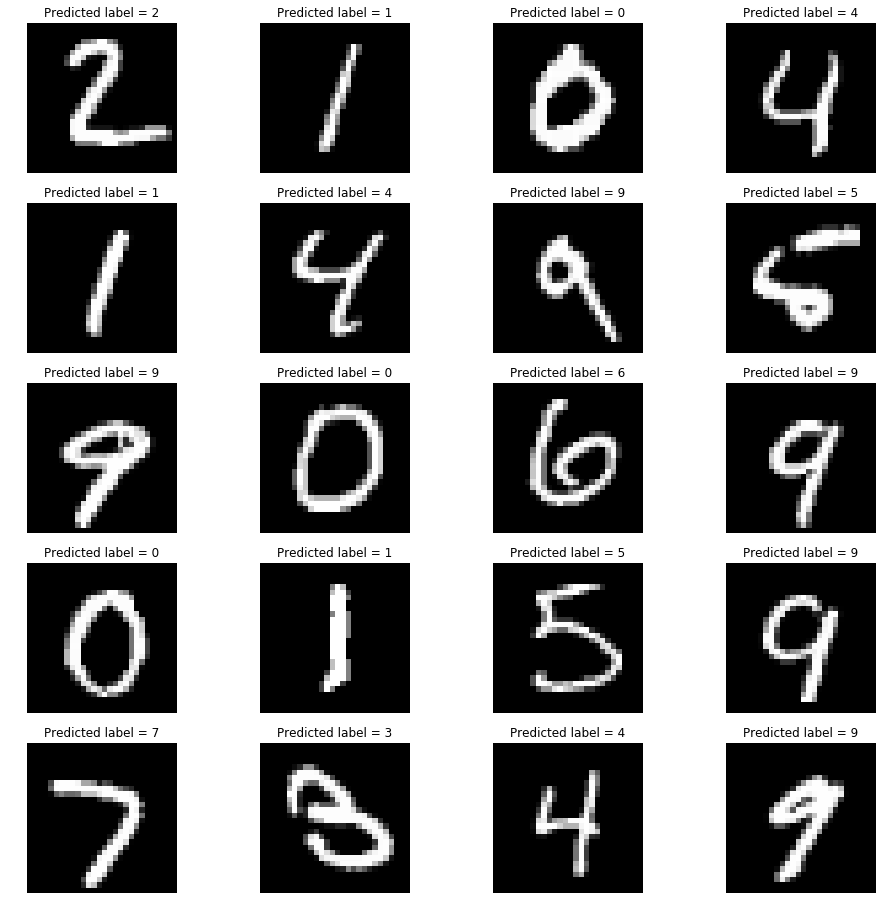

In [14]:
# Predict single images
n_images = 21

# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images[:n_images]},shuffle=False)

# Use the model to predict the images class
predictions = list(model.predict(input_fn))

# Display
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(test_images[i],cmap='gray')
    plt.title('Predicted label = {}'.format(predictions[i]))
    plt.axis('off')   
plt.show()